Stock Market Price Prediction with New Data
Breif Overview: 

The model created below is for prediction the stock prices of a Company. 
There are two datasets 

1. Stock Prices Dataset for Dow Jones Inc 

2. Top 25 headlines for everyday for the past 8 years 

The notebook is briefly summarized as follows: 

1. Data Preparation - Preparing data for evaluation. 

2. Data Quality Checks - Performing basic checks on data for better understanding of data. 

3. Feature inspection and filtering - Correlation and feature Mutual information plots against the target variable. Inspection of the Binary, categorical and other variables. 

4. Feature importance ranking via learning models 

5. Training - training data against multiple machine learning algorthms and fine tuning a couple of algorithms for accuracy 

In [41]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [3]:
ComNews = pd.read_csv('C:/Working Folder/Data/StockPredictionUsingNews/Combined_News_DJIA.csv')
StockData = pd.read_csv('C:/Working Folder/Data/StockPredictionUsingNews/DJIA_table.csv') 
RedNews = pd.read_csv('C:/Working Folder/Data/StockPredictionUsingNews/RedditNews.csv')

In [4]:
ComNews.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [5]:
StockData.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,17949.369141
1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,17929.990234
2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,17694.679688
3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,17409.720703
4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,17140.240234


In [6]:
RedNews.head()

,Date,News
0,2016-07-01,A 117-year-old woman in Mexico City finally re...
1,2016-07-01,IMF chief backs Athens as permanent Olympic host
2,2016-07-01,"The president of France says if Brexit won, so..."
3,2016-07-01,British Man Who Must Give Police 24 Hours' Not...
4,2016-07-01,100+ Nobel laureates urge Greenpeace to stop o...


In [7]:
combined = ComNews.copy()
combined.shape

(1989, 27)

Joining all headlines for each row together

In [8]:
combined['Combined'] = combined.iloc[:,2:27].apply(lambda row: ''.join(str(row.values)), axis=1)

In [9]:
combined.shape

(1989, 28)

In [10]:
combined['Combined'].iloc[:20]

0     [ 'b"Georgia \'downs two Russian warplanes\' a...
1     [ "b'Why wont America and Nato help us? If the...
2     [ "b'Remember that adorable 9-year-old who san...
3     ["b' U.S. refuses Israel weapons to attack Ira...
4     ["b'All the experts admit that we should legal...
5     [ 'b"Mom of missing gay man: Too bad he\'s not...
6     [ "b'In an Afghan prison, the majority of fema...
7     [ 'b"Man arrested and locked up for five hours...
8     [ "b'Two elderly Chinese women have been sente...
9     [ 'b"British resident held in Guantanamo Bay w...
10    [ "b'Syria says its ready to put a Russian mis...
11    [ 'b"N Korea\'s Kim died in 2003; replaced by ...
12    [ "b'North Korea halts denuclearisation after ...
13    ["b'Photos of a 15-year-old Iraqi suicide bomb...
14    ['b"Military help for Georgia is a \'declarati...
15    [ "b'Russian Prime Minister Vladimir Putin has...
16    [ 'b"A girl filmed Israeli soldiers\' brutalit...
17    [ "b'Poland Legalization of Marijuana - tw

In [11]:
combined.dtypes

Date        object
Label        int64
Top1        object
Top2        object
Top3        object
Top4        object
Top5        object
Top6        object
Top7        object
Top8        object
Top9        object
Top10       object
Top11       object
Top12       object
Top13       object
Top14       object
Top15       object
Top16       object
Top17       object
Top18       object
Top19       object
Top20       object
Top21       object
Top22       object
Top23       object
Top24       object
Top25       object
Combined    object
dtype: object

In [12]:
type(combined)

pandas.core.frame.DataFrame

In [14]:
combined.to_csv('C:/Working Folder/Data/StockPredictionUsingNews/comb1.csv')

Spliting data into train and test

In [15]:
train = ComNews[ComNews['Date'] < '2015-01-01']
test = ComNews[ComNews['Date'] > '2014-12-31']

In [16]:
print("Length of train is",len(train))
print("Length of test is", len(test))

Length of train is 1611
Length of test is 378


Converting data from Pandas DataFrame to List

In [17]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:27]))
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:27]))

In [61]:
trainheadlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

In [62]:
testheadlines[0]

'Most cases of cancer are the result of sheer bad luck rather than unhealthy lifestyles, diet or even inherited genes, new research suggests. Random mutations that occur in DNA when cells divide are responsible for two thirds of adult cancers across a wide range of tissues. Iran dismissed United States efforts to fight Islamic State as a ploy to advance U.S. policies in the region: "The reality is that the United States is not acting to eliminate Daesh. They are not even interested in weakening Daesh, they are only interested in managing it" Poll: One in 8 Germans would join anti-Muslim marches UK royal family\'s Prince Andrew named in US lawsuit over underage sex allegations Some 40 asylum-seekers refused to leave the bus when they arrived at their destination in rural northern Sweden, demanding that they be taken back to Malm or "some big city". Pakistani boat blows self up after India navy chase. All four people on board the vessel from near the Pakistani port city of Karachi are be

Exploratory Data Analysis

In [20]:
train = combined[combined['Date'] < '2015-01-01']
test = combined[combined['Date'] > '2014-12-31']

In [21]:
non_decrease = train[train['Label']==1]
decrease = train[train['Label']==0]
print(len(non_decrease)/len(train))

0.5418994413407822


In [22]:
non_decrease_test = test[test['Label']==1]
decrease_test = test[test['Label']==0]
print(len(non_decrease_test)/len(test))

0.5079365079365079


We can understand that occurance of non-decrease situation is almost equal to that of a decrease market

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS
import re
import nltk
from nltk.corpus import stopwords
def to_words(content): ### function to clean the words
    letters_only = re.sub("[^a-zA-Z]", " ", content) ### get only letters
    words = letters_only.lower().split()             ### lowercase       
    stops = set(stopwords.words("english"))         ### remove stopwords such as 'the', 'and' etc.         
    meaningful_words = [w for w in words if not w in stops] ### get meaningful words
    return( " ".join( meaningful_words )) 

In [36]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))

for each in decrease['Combined']:
    decrease_word.append(to_words(each))

In [37]:
non_decrease_word=[]
decrease_word=[]
for each in non_decrease['Combined']:
    non_decrease_word.append(to_words(each))

for each in decrease['Combined']:
    decrease_word.append(to_words(each))

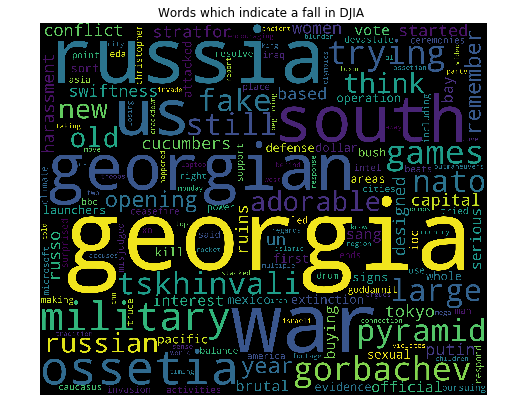

In [38]:
wordcloud1 = WordCloud(background_color='black',
                      width=3000,
                      height=2500
                     ).generate(decrease_word[1])
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

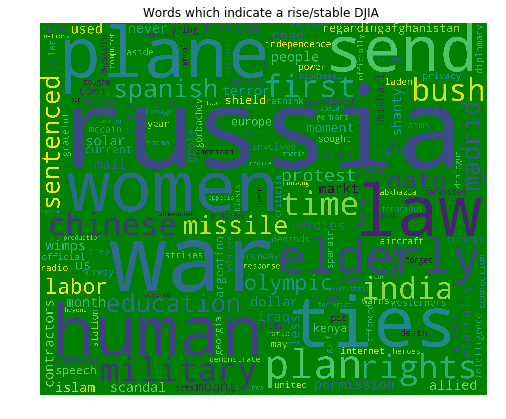

In [39]:
wordcloud2 = WordCloud(background_color='green',
                      width=3000,
                      height=2500
                     ).generate(non_decrease_word[3])
plt.figure(1,figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise/stable DJIA ")
plt.show()

In [43]:
basicvectorizer = CountVectorizer()
basictrain = basicvectorizer.fit_transform(trainheadlines)

In [48]:
print(basictrain.shape)

(1611, 31675)


The result table contains count for 31,675 different words!

In [56]:
LRmodel = LogisticRegression()
basicmodel = LRmodel.fit(basictrain, train["Label"])

In [57]:
print(basicmodel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [58]:
basictest = basicvectorizer.transform(testheadlines)
pred = LRmodel.predict(basictest)

To view the results we will use a crosstab

In [63]:
pd.crosstab(test["Label"], pred, rownames=["Actual"], colnames = ["Predicted"])

Predicted,0,1
Actual,,
0,61,125
1,92,100


In [66]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(test["Label"], pred) * 100
print(acc)

42.5925925926


Prediction accuracy is around 42% for Logistic Regression

In [76]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(max_depth=2)
avr=0
model1 = RF_clf.fit(basictrain,train["Label"])
pred_RF = RF_clf.predict(basictest)

In [80]:
acc_RF = accuracy_score(test["Label"], pred_RF)*100

In [82]:
print(acc_RF)

50.2645502646


Prediction accuracy is around 50% for Random Forest Classifier

In [71]:
LRmodel.predict(basictrain)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

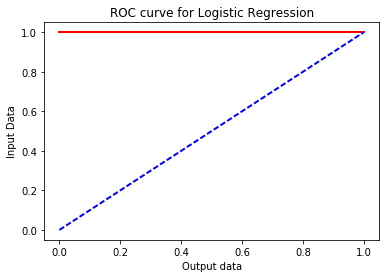

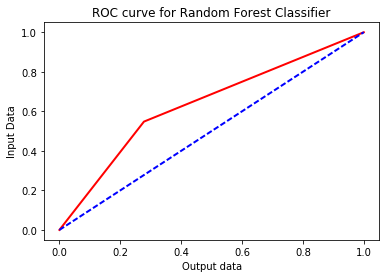

In [87]:
from sklearn.metrics import roc_curve
fpr, tpr,_=roc_curve(LRmodel.predict(basictrain),train["Label"],drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=train["Label"])
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('Output data')
plt.ylabel('Input Data')
plt.title('ROC curve for Logistic Regression')
plt.show()
fpr, tpr,_=roc_curve(RF_clf.predict(basictrain),train["Label"],drop_intermediate=False)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label=train["Label"])
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('Output data')
plt.ylabel('Input Data')
plt.title('ROC curve for Random Forest Classifier')
plt.show()